<a href="https://colab.research.google.com/github/SampannaMishra/Health_Insurance_Cross_Selling_Prediction/blob/main/Health_Insurance_Cross_Selling_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 : Customer is interested, 0 : Customer is not interested

In [ ]:
! pip install sidetable -U

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone project/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
# finding the shape
data.shape

(381109, 12)

In [ ]:
# displaying few rows from the dataset
data.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
# information about the datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## **Data Preprocessing**

Remove the rows/columns containing the null or missing values

Remove duplicates

Detecting duplicate values and deleting it.

In [ ]:
# checking number of null values
data.isnull().sum()

# no null values present

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
print(data.dropna(how='any'))

In [ ]:
# Checking duplicate values

len(data[data.duplicated()])

# no duplicate rows found based on all columns

0

## **Exploratory Data Analysis**

In [ ]:
# Gender
data.stb.freq(['Gender'], cum_cols = False)

# 54 % of the customer of the health insurance is male 

,Gender,count,percent
0,Male,206089,54.07613
1,Female,175020,45.92387


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


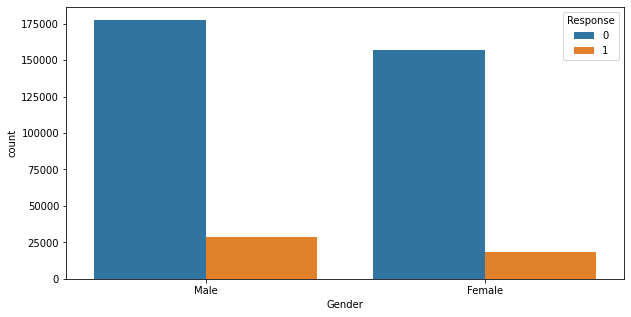

In [ ]:
## gender and response 

pd.crosstab(index = data['Response'], columns = data['Gender'], normalize = 'index')

plt.figure(figsize = (10, 5))
sns.countplot(data['Gender'], hue = data['Response'])
plt.show()


## male are more likely  to be interested to vehicle insurance compared to women
## 61% of interested response are from male respondents


In [ ]:
### average age and response

pd.crosstab(index = data['Response'], columns = 'Average Age', values = data['Age'], aggfunc='mean')

# the average age of customer who is interested with vehicle insurance is 43 years old 
# while for customers who's not interested are 38 yo
# this might show that younger customers are not interested with vehicle insurance

col_0,Average Age
Response,
0,38.178227
1,43.435560


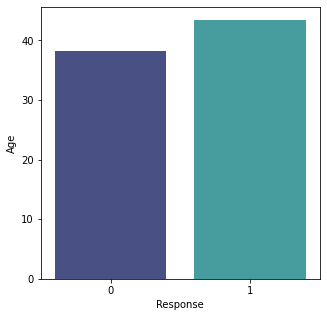

In [ ]:
plt.figure(figsize = (5, 5))
sns.barplot(x = data['Response'], y = data['Age'], palette = 'mako', ci = False)
plt.show()

In [ ]:
### average age and Previously Insured

pd.crosstab(index = data['Previously_Insured'], columns = 'Average Age', values = data['Age'], aggfunc='mean')

# The Average age of customer that has a vehicle insurance is 34.5 
# and the average age of customer that does not have a vehicle insurance is 42.4

# this tells that young customer will probably have a vehicle insurance compared to the older customers

col_0,Average Age
Previously_Insured,
0,42.45564
1,34.52684


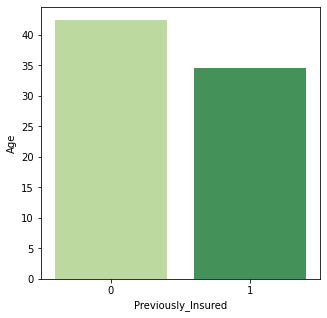

In [ ]:
plt.figure(figsize = (5, 5))
sns.barplot(x = data['Previously_Insured'], y = data['Age'], palette = 'YlGn', ci = False)
plt.show()

In [ ]:
pd.crosstab(index = data['Response'], columns = data['Previously_Insured'], normalize = 'columns')

# almost every customer who already have a vehicle insurance is not interested with another vehicle insurance
# out of all customer who does not have a vehicle insurance almost a quarter of them are intersted with vehicle insurance

Previously_Insured,0,1
Response,,
0,0.774546,0.999095
1,0.225454,0.000905


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


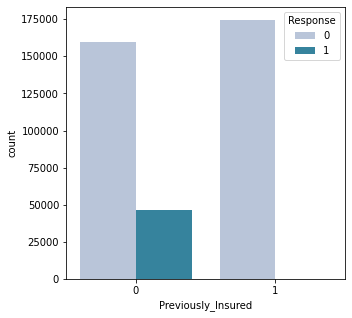

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(data['Previously_Insured'], hue = data['Response'], palette = 'PuBuGn')
plt.show()

In [ ]:
pd.crosstab(index = data['Response'], columns = data['Vehicle_Age'], normalize = 'columns')

# from the vehicle age group customer who has a newer vehicle are less likely to be interested with vehicle insurance
# customer who has a vehicle that's older than 2 years are more likely to be interested to vehicle insurance

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,0.826245,0.956295,0.706254
1,0.173755,0.043705,0.293746


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


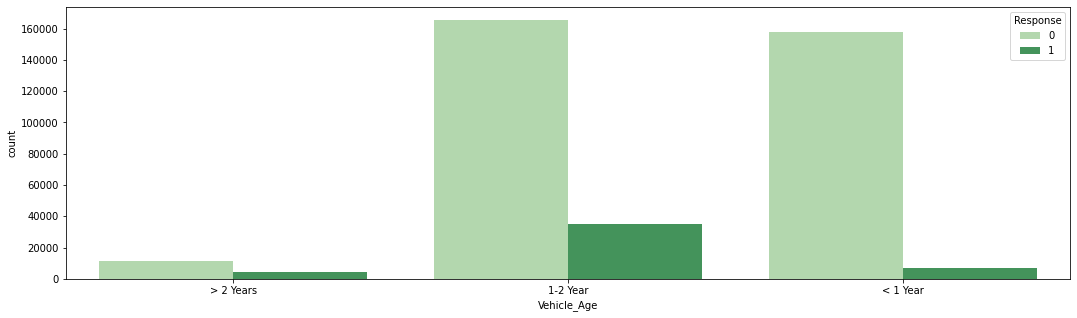

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(data['Vehicle_Age'], hue = data['Response'], palette = 'Greens')
plt.show()

In [ ]:
pd.crosstab(index = data['Previously_Insured'], columns = data['Vehicle_Age'], normalize = 'columns')

# the newer the vehicle the more likely it's insured 
# this columns below showed that 66.3% of car aged 1 or below are insured

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Previously_Insured,,,
0,0.67389,0.336976,0.997126
1,0.32611,0.663024,0.002874


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


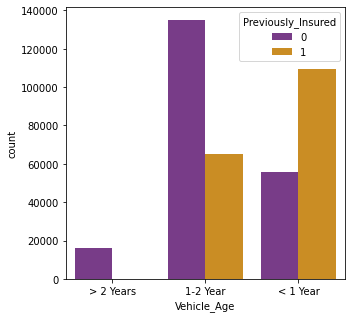

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(data['Vehicle_Age'], hue = data['Previously_Insured'], palette = 'CMRmap')
plt.show()

In [ ]:
pd.crosstab(index = data['Response'], columns = [data['Vehicle_Age'], data['Previously_Insured']], normalize = 'columns')

# customer who has a  newer car are more likely to have their vehicle insured
# this could be an insight that insurance company needs to work with a dealership
    # to have a bundling product of vehicle & insurance
    

Vehicle_Age         1-2 Year            < 1 Year           > 2 Years          
Previously_Insured         0         1         0         1         0         1
Response                                                                      
0                   0.742864  0.998546  0.871419  0.999433   0.70547  0.978261
1                   0.257136  0.001454  0.128581  0.000567   0.29453  0.021739

In [ ]:
pd.crosstab(index = data['Response'], columns = data['Vehicle_Damage'], normalize = 'index')

## customer who're intersted with vehicle insurance 98% have had a vehicle damage in the past

Vehicle_Damage,No,Yes
Response,,
0,0.561347,0.438653
1,0.021023,0.978977


In [ ]:
pd.crosstab(index = data['Previously_Insured'], columns = data['Vehicle_Damage'], normalize = 'columns')

# almost 95 % customer who have had their vehicle previously damaged doesn't have a vehicle insurance
# while 87 % of customer who had never have any vehicle damaged have a vehicle insurance

# People who have vehicle insurance are more likely to be careful to their vehicle

Vehicle_Damage,No,Yes
Previously_Insured,,
0,0.127136,0.948434
1,0.872864,0.051566


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


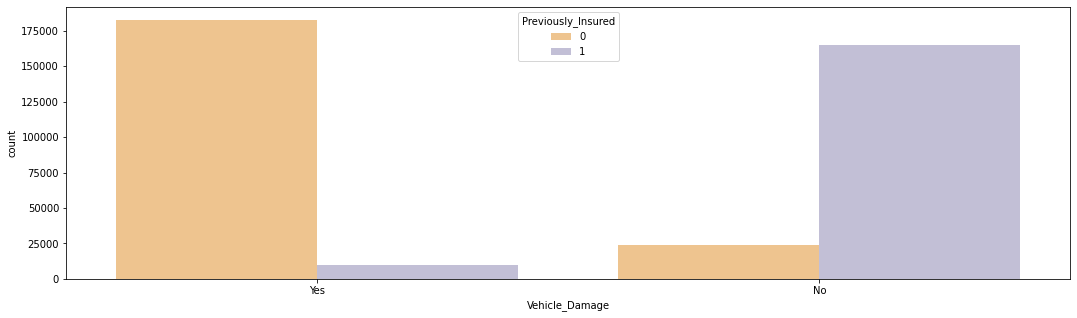

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(data['Vehicle_Damage'], hue = data['Previously_Insured'], palette = 'PuOr')
plt.show()

In [ ]:
pd.crosstab(index = data['Vehicle_Age'], columns = data['Vehicle_Damage'], normalize = 'index')

# cars that's more than 2 years of age are the most likely to have had a vehicle damage 
# the younger the vehicle the less likely that the vehicle has a vehicle damage

Vehicle_Damage,No,Yes
Vehicle_Age,,
1-2 Year,0.359886,0.640114
< 1 Year,0.707524,0.292476
> 2 Years,0.000937,0.999063


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


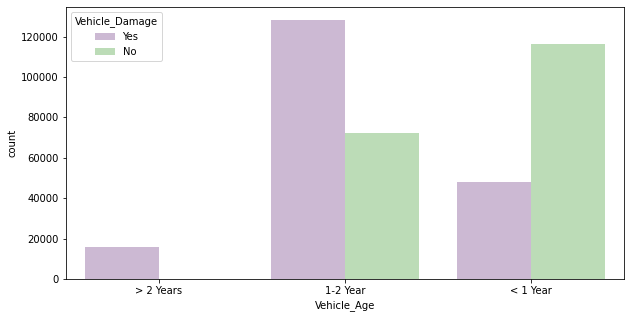

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(data['Vehicle_Age'], hue = data['Vehicle_Damage'], palette = 'PRGn')
plt.show()

In [ ]:
## Sales Channel


pd.crosstab(index = data['Policy_Sales_Channel'], columns = data['Response'], normalize = 'columns').sort_values(1, ascending = False).head()

# the policy sales channel no 26 and policy sales channel number 124 are the 2 highest percentage of interested response
# there's no further explanataion on what are this number 

Response,0,1
Policy_Sales_Channel,,
26.0,0.190817,0.340206
124.0,0.179423,0.299636
152.0,0.391526,0.082595
156.0,0.025012,0.049176
157.0,0.014623,0.038407


In [ ]:
pd.crosstab(index = data['Region_Code'], columns = data['Response'], normalize = 'index').sort_values(1, ascending = False).head()


# if we compared region to region interested rate, region 38 has the highest percentage of interested 
# while region 28 is on the 2nd place 


Response,0,1
Region_Code,,
38.0,0.807996,0.192004
28.0,0.812837,0.187163
19.0,0.837134,0.162866
4.0,0.841755,0.158245
23.0,0.846939,0.153061


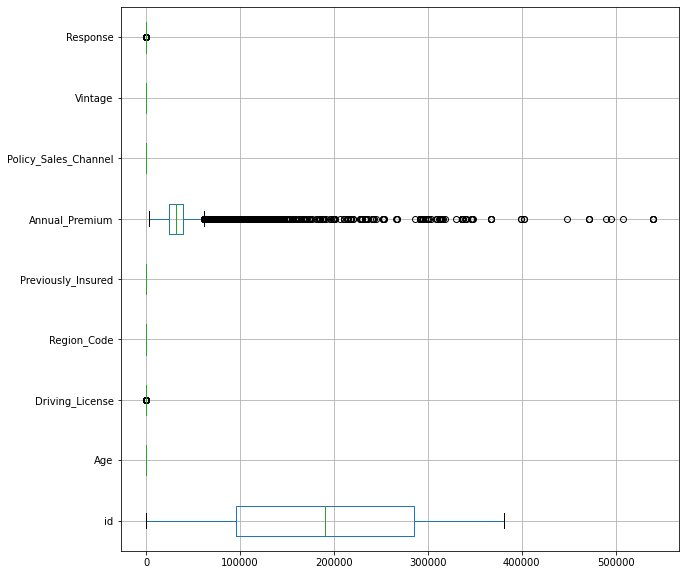

In [ ]:
# Detecting the outliers by using boxplot
plt.figure(figsize=(10,10))
data.boxplot(vert=0)
plt.show()

**From the above plot it can be detected that Annual Premium column has outliers**

In [ ]:
# IQR
Q1 = np.percentile(data['Annual_Premium'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(data['Annual_Premium'], 75,
                   interpolation = 'midpoint')

In [ ]:
IQR = Q3 - Q1

In [ ]:
print("Old Shape: ", data.shape)

Old Shape:  (381109, 12)


In [ ]:
# Upper bound
upper = np.where(data['Annual_Premium']>= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['Annual_Premium'] <= (Q1-1.5*IQR))

In [ ]:
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

New Shape:  (370789, 12)


In [ ]:
df = data.copy()

In [ ]:
# collecting the object type features
cat=[]
for i in df.columns:
    if df[i].dtype=="object":
           cat.append(i)

print(cat)


['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [ ]:
encoded =pd.get_dummies(df[cat],drop_first=True)

In [ ]:
encoded

,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,0,1,1
1,1,0,0,0
2,1,0,1,1
3,1,1,0,0
4,0,1,0,0
...,...,...,...,...
381104,1,0,0,0
381105,1,1,0,0
381106,1,1,0,0
381107,0,0,1,1


In [ ]:
df_merge = pd.concat([encoded,df],axis=1)

In [ ]:
df_merge

,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,1,1,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1,0,0,0,2,Male,76,1,3,0,1-2 Year,No,33536.0,26.0,183,0
2,1,0,1,1,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26.0,27,1
3,1,1,0,0,4,Male,21,1,11,1,< 1 Year,No,28619.0,152.0,203,0
4,0,1,0,0,5,Female,29,1,41,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0,0,0,381105,Male,74,1,26,1,1-2 Year,No,30170.0,26.0,88,0
381105,1,1,0,0,381106,Male,30,1,37,1,< 1 Year,No,40016.0,152.0,131,0
381106,1,1,0,0,381107,Male,21,1,30,1,< 1 Year,No,35118.0,160.0,161,0
381107,0,0,1,1,381108,Female,68,1,14,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
# deleting the redundant columns
df_merge.drop(['id','Gender','Vehicle_Age','Vehicle_Damage'],inplace = True,axis=1)

### **Correlation Matrix**

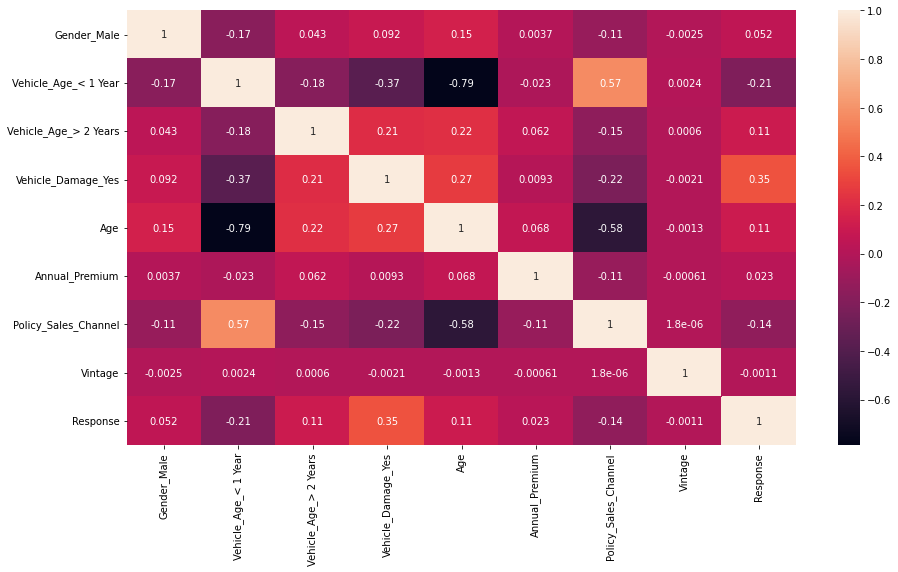

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_merge.corr(),annot=True)
plt.show()

**Now Looking at the correlation that shows that Previously insured and Vehicle Damage highly correlated ,Age of Vehicle<1 yearand Age of the the person is also highly correlated and Policy_Sales_Channel and Age are also highly correlated**

In [ ]:
# dropping the id and Vehicle_Age_< 1 Year columns
df_merge.drop(['Vehicle_Age_< 1 Year','Policy_Sales_Channel'],inplace = True,axis=1)

In [ ]:
# renaming the columns to meaningful names
df_merge.rename(columns = {'Vehicle_Age_> 2 Years':'VehicleAgemoretwo','Vehicle_Damage_Yes':'Vehicle_Damaged'}, inplace = True)

In [ ]:
# converting the customerID to category datatype
df_merge['Driving_License'] = df_merge['Driving_License'].astype('category')
df_merge['Region_Code'] = df_merge['Region_Code'].astype('int64').astype('category')
df_merge['Previously_Insured'] = df_merge['Previously_Insured'].astype('category')


In [ ]:
# changing the datatypes of newly added columns after one-hot encoding operation
df_merge['Gender_Male'] = df_merge['Gender_Male'].astype('category')
df_merge['VehicleAgemoretwo'] = df_merge['VehicleAgemoretwo'].astype('category')
df_merge['Vehicle_Damaged'] = df_merge['Vehicle_Damaged'].astype('category')
df_merge['Annual_Premium'] = df_merge['Annual_Premium'].astype('int64')

## **Splitting the data**

In [ ]:
df_ = df_merge.copy()

In [ ]:
df_

,Gender_Male,VehicleAgemoretwo,Vehicle_Damaged,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response
0,1,1,1,44,1,28,0,40454,217,1
1,1,0,0,76,1,3,0,33536,183,0
2,1,1,1,47,1,28,0,38294,27,1
3,1,0,0,21,1,11,1,28619,203,0
4,0,0,0,29,1,41,1,27496,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,0,0,74,1,26,1,30170,88,0
381105,1,0,0,30,1,37,1,40016,131,0
381106,1,0,0,21,1,30,1,35118,161,0
381107,0,1,1,68,1,14,0,44617,74,0


In [ ]:
max_age=max(df_.Age)
min_age=min(df_.Age)
df_.Age=df_.Age.apply(lambda x: (x-min_age)/(max_age-min_age))

In [ ]:
max_premium=max(df_.Annual_Premium)
min_premium=min(df_.Annual_Premium)
df_.Annual_Premium=df_.Annual_Premium.apply(lambda x: (x-min_premium)/(max_premium-min_premium))

In [ ]:
df_

,Gender_Male,VehicleAgemoretwo,Vehicle_Damaged,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response
0,1,1,1,0.369231,1,28,0,0.070366,217,1
1,1,0,0,0.861538,1,3,0,0.057496,183,0
2,1,1,1,0.415385,1,28,0,0.066347,27,1
3,1,0,0,0.015385,1,11,1,0.048348,203,0
4,0,0,0,0.138462,1,41,1,0.046259,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,0,0,0.830769,1,26,1,0.051234,88,0
381105,1,0,0,0.153846,1,37,1,0.069551,131,0
381106,1,0,0,0.015385,1,30,1,0.060439,161,0
381107,0,1,1,0.738462,1,14,0,0.078110,74,0


In [ ]:
bought = df_[df_['Response']==1]
not_bought = df_[df_['Response']==0]
print(bought.shape,not_bought.shape)


# this shows the data is highly imbalanced. Need pf oversampling in the dataset

(46710, 10) (334399, 10)


In [ ]:
#Assign the value in X and Y
X = df_.drop(columns=['Response'], axis=1)
Y = df_['Response']

In [ ]:
X_arr = np.array(X)
Y_arr = np.array(Y)

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size = 0.2, random_state = 0)

In [ ]:
# Oversampling the data
os_us = SMOTETomek(sampling_strategy=0.5)

X_train1, Y_train1 = os_us.fit_resample(X_train, Y_train)

X_test1, Y_test1 = os_us.fit_resample(X_test, Y_test)


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(random_state=42,max_depth=8)
grid1=GridSearchCV(model1,param_grid={'max_depth':range(5,8)})
grid1.fit(X_train1,Y_train1)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=8, random_state=42),
             param_grid={'max_depth': range(5, 8)})

In [ ]:
grid1.best_params_

{'max_depth': 7}

In [ ]:
classifier1=DecisionTreeClassifier(random_state=42,max_depth=7)
classifier1.fit(X_train1,Y_train1)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
Y_test_pred= classifier1.predict(X_test1)
Y_train_pred= classifier1.predict(X_train1)

In [ ]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train1,Y_train_pred)

array([[209973,  43971],
       [ 20573,  99594]])

In [ ]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test1,Y_test_pred)

array([[52449, 11216],
       [ 4911, 25331]])

In [ ]:
print('Classification report of train data \n',classification_report(Y_train1, Y_train_pred))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87    253944
           1       0.69      0.83      0.76    120167

    accuracy                           0.83    374111
   macro avg       0.80      0.83      0.81    374111
weighted avg       0.84      0.83      0.83    374111



In [ ]:
print('Classification report of test data \n',classification_report(Y_test1,Y_test_pred))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.91      0.82      0.87     63665
           1       0.69      0.84      0.76     30242

    accuracy                           0.83     93907
   macro avg       0.80      0.83      0.81     93907
weighted avg       0.84      0.83      0.83     93907



## **Random Forest**

In [ ]:
classifier2 = RandomForestClassifier() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier_hp = GridSearchCV(classifier2, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier_hp.fit(X_train1, Y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [ ]:
classifier_hp.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [198]:
classifier2=RandomForestClassifier(n_estimators=100,max_depth=7)
classifier2.fit(X_train1,Y_train1)

RandomForestClassifier(max_depth=7)

In [199]:
Y_test_pred_hp= classifier2.predict(X_test1)
Y_train_pred_hp= classifier2.predict(X_train1)

In [202]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train1,Y_train_pred_hp)

array([[209844,  44100],
       [ 18693, 101474]])

In [203]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test1,Y_test_pred_hp)

array([[52422, 11243],
       [ 4221, 26021]])

In [200]:
print('Classification report of train data \n',classification_report(Y_train1, Y_train_pred_hp))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87    253944
           1       0.70      0.84      0.76    120167

    accuracy                           0.83    374111
   macro avg       0.81      0.84      0.82    374111
weighted avg       0.85      0.83      0.84    374111



In [201]:
print('Classification report of test data \n',classification_report(Y_test1,Y_test_pred_hp))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     63665
           1       0.70      0.86      0.77     30242

    accuracy                           0.84     93907
   macro avg       0.81      0.84      0.82     93907
weighted avg       0.85      0.84      0.84     93907



## **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier3 = GradientBoostingClassifier()

In [ ]:
# Fit the object to train dataset
classifier3.fit(X_train1, Y_train1)

GradientBoostingClassifier()

In [ ]:
train_class_preds_gb = classifier3.predict(X_train1)
test_class_preds_gb = classifier3.predict(X_test1)

In [204]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train1,train_class_preds_gb)


array([[215110,  38834],
       [ 20456,  99711]])

In [205]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test1,test_class_preds_gb)

array([[53675,  9990],
       [ 4556, 25686]])

In [ ]:
print('Classification report of train data \n',classification_report(Y_train1,train_class_preds_gb ))


Classification report of train data 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88    253944
           1       0.72      0.83      0.77    120167

    accuracy                           0.84    374111
   macro avg       0.82      0.84      0.82    374111
weighted avg       0.85      0.84      0.84    374111



In [ ]:
print('Classification report of test data \n',classification_report(Y_test1,test_class_preds_gb))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     63665
           1       0.72      0.85      0.78     30242

    accuracy                           0.85     93907
   macro avg       0.82      0.85      0.83     93907
weighted avg       0.86      0.85      0.85     93907



## **Xtreme Gradient Boosting**

In [ ]:
classifier4=XGBClassifier()
classifier4.fit(X_train1 , Y_train1)

XGBClassifier()

In [185]:
grid_val = {"learning_rate":[0.05, 0.10,],"max_depth": [4, 6], "gamma": [0.2 , 0.3]}
classifier_hpt = GridSearchCV(classifier4, param_grid = grid_val, scoring = 'roc_auc', cv=4)

In [186]:
# Fit the object to train dataset
classifier_hpt.fit(X_train1, Y_train1)

GridSearchCV(cv=4, estimator=XGBClassifier(),
             param_grid={'gamma': [0.2, 0.3], 'learning_rate': [0.05, 0.1],
                         'max_depth': [4, 6]},
             scoring='roc_auc')

In [187]:
classifier_hpt.best_params_

{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 6}

In [219]:
classifier4=XGBClassifier(learning_rate=0.1,max_depth=6,gamma=0.3)
classifier4.fit(X_train1,Y_train1)

XGBClassifier(gamma=0.3, max_depth=6)

In [220]:
Y_test_pred_xg= classifier4.predict(X_test1)
Y_train_pred_xg= classifier4.predict(X_train1)

In [221]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train1,Y_train_pred_xg)

array([[228053,  25891],
       [ 17611, 102556]])

In [222]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test1,Y_test_pred_xg)

array([[57049,  6616],
       [ 4427, 25815]])

In [223]:
print('Classification report of train data \n',classification_report(Y_train1,Y_train_pred_xg))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91    253944
           1       0.80      0.85      0.83    120167

    accuracy                           0.88    374111
   macro avg       0.86      0.88      0.87    374111
weighted avg       0.89      0.88      0.88    374111



In [224]:
print('Classification report of test data \n',classification_report(Y_test1,Y_test_pred_xg))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     63665
           1       0.80      0.85      0.82     30242

    accuracy                           0.88     93907
   macro avg       0.86      0.87      0.87     93907
weighted avg       0.89      0.88      0.88     93907



## **Naive Bayes Classifier**

In [211]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train1, Y_train1)

GaussianNB()

In [212]:
Y_test_pred_nb= classifier5.predict(X_test1)
Y_train_pred_nb= classifier5.predict(X_train1)

In [213]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train1,Y_train_pred_nb)

array([[158194,  95750],
       [  2589, 117578]])

In [214]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test1,Y_test_pred_nb)

array([[39513, 24152],
       [  748, 29494]])

In [215]:
print('Classification report of train data \n',classification_report(Y_train1,Y_train_pred_nb))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.98      0.62      0.76    253944
           1       0.55      0.98      0.71    120167

    accuracy                           0.74    374111
   macro avg       0.77      0.80      0.73    374111
weighted avg       0.84      0.74      0.74    374111



In [217]:
print('Classification report of test data \n',classification_report(Y_test1,Y_test_pred_nb))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.98      0.62      0.76     63665
           1       0.55      0.98      0.70     30242

    accuracy                           0.73     93907
   macro avg       0.77      0.80      0.73     93907
weighted avg       0.84      0.73      0.74     93907

